# Research Summary 06/20 

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)
#plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_Hopping.pdf"), format="pdf")

## Operator Bound Analysis

In [5]:
import numpy as np 
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs
def OpNorm(elevel):
    #Takes in Energy Levels and outputs operator norm of the normalized and non-normalized Ashabb Hamiltonian
    splus = np.zeros([elevel,elevel])
    splusn = np.zeros([elevel,elevel])
    for e in range(elevel-1):
        splus[e,e+1] = np.sqrt(e+1)
        splusn[e,e+1] = 1
    
    H = splus + np.transpose(splus)
    H = np.kron(H,H)
    normH = splusn + np.transpose(splusn)
    normH = np.kron(normH,normH)

    if elevel > 2:
        H = csr_matrix(H)
        normH = csr_matrix(normH)
        [evals,evecs] = eigs(H)
        [evalsn,evecsn] = eigs(normH)
        return [abs(max(evals,key=abs)),abs(max(evalsn,key=abs))]
    else: return [abs(max(np.linalg.eigvals(H),key=abs)),abs(max(np.linalg.eigvals(normH),key=abs))]


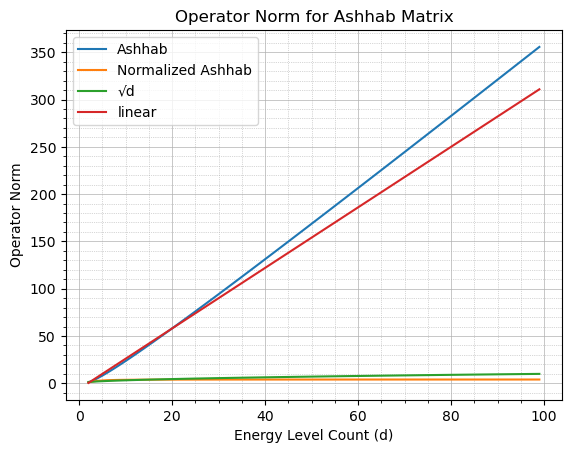

In [6]:
import matplotlib.pyplot as plt
plt.style.use('default')

elevels = np.array([int(i) for i in range(2,100)])
norms = [OpNorm(e) for e in elevels]
roots = [np.sqrt(e) for e in elevels]
squares = [e ** 2 for e in elevels]

plt.plot(elevels,norms)
plt.plot(elevels,roots)
plt.plot(elevels,3.2*elevels - 6)

plt.xlabel("Energy Level Count (d)")
plt.ylabel("Operator Norm")
plt.title("Operator Norm for Ashhab Matrix")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.legend(["Ashhab","Normalized Ashhab","\u221Ad","linear"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_OpNorm.pdf"), format="pdf")

## Ashhab Hopping Hamiltonian

Here we are going to analyzing the speed-up from the Ashhab Hamiltonian with only hopping terms. 

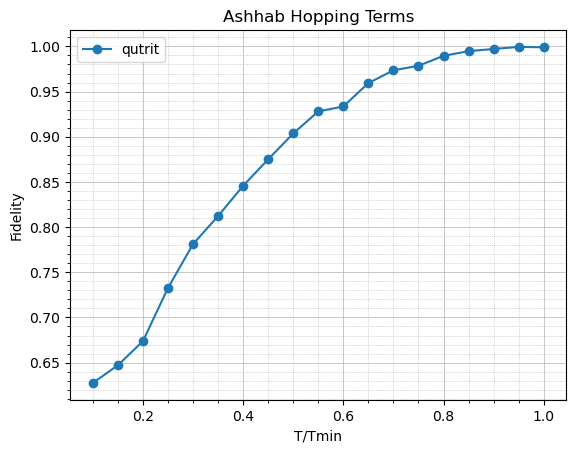

In [ ]:
Ashhab_Hopp = pd.read_csv("../ML_Output/Qutrit_CNOT_Ashhab_Hopp_M8_all_g1.0.csv",names=["fidelity","time"])
Ashhab_Hopp.sort_values(by="time",inplace=True)
Ashhab_Hopp = Ashhab_Hopp.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp,["qutrit"])

Here we see the hoping terms for the Ashhab Hamiltonian do provide some sort of speed-up. But let's compare this to the traditional Ashhab and different qubit coupling strengths. 

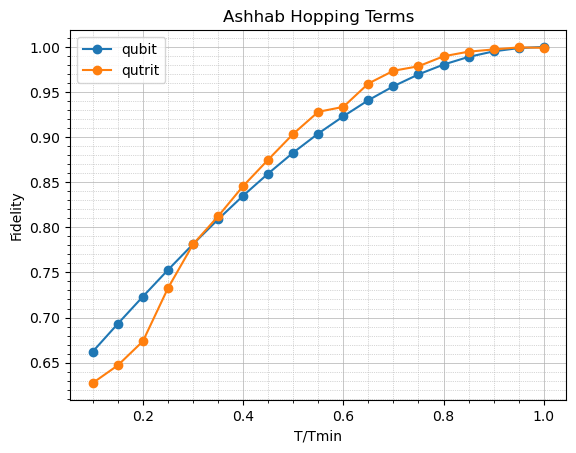

In [ ]:
CNOT_PDF = pd.read_csv("../ML_Output/Qutrit_CNOT_CNOT_Protocol_M8_all_g1.csv",names=["fidelity","time"])
CNOT_PDF.sort_values(by="time",inplace=True)
CNOT_PDF = CNOT_PDF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_PDF,["CNOT Protocol"])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp,["qubit","qutrit"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_Hopping.pdf"), format="pdf")

Here we see that there is little to no speed-up from the hopping terms. This must indicate that the majority of the speed-up is from the constructive interference from the parity two operators $(a_1a_2 + a_1^\dagger a_2^\dagger + \text{h.c.})$ This also indicates that the higher magnitude couplings for higher energy states have little effect on the speed-up of the system, or that our optimization cannot find the optimal solution. 

Testing our optimizer with higher segment counts and only with qutrit drives, we have 

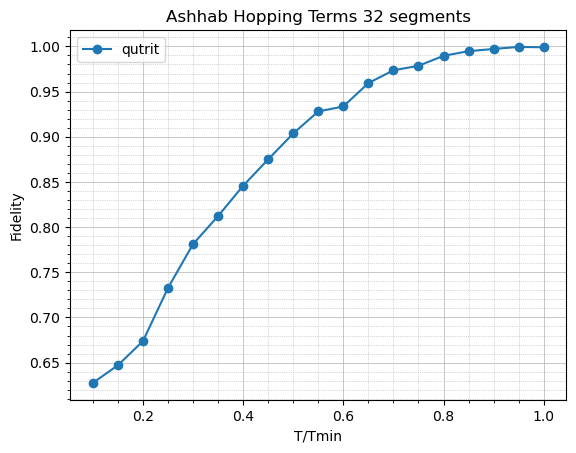

In [ ]:
Ashhab_Hopp32 = pd.read_csv("../ML_Output/Qutrit_CNOT_Ashhab_Hopp_M32_all_g1.0.csv",names=["fidelity","time"])
Ashhab_Hopp32.sort_values(by="time",inplace=True)
Ashhab_Hopp32 = Ashhab_Hopp32.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("Ashhab Hopping Terms 32 segments",Ashhab_Hopp,["qutrit"])

Now let's compare this to our original Ashhab hopping term Hamiltonian with 8 segments and the qubit optimization case. 

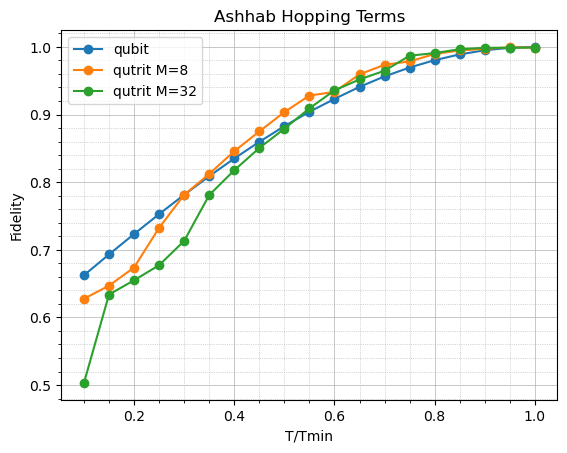

In [ ]:
genPlot("CNOT Protocol",CNOT_PDF,["CNOT Protocol"])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp,["qubit","qutrit"])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp32,["qubit","qutrit M=8","qutrit M=32"])

Let's check if increasing the segments to 100 leads to a converge to the conjectured 2 magnitude speed-up. 

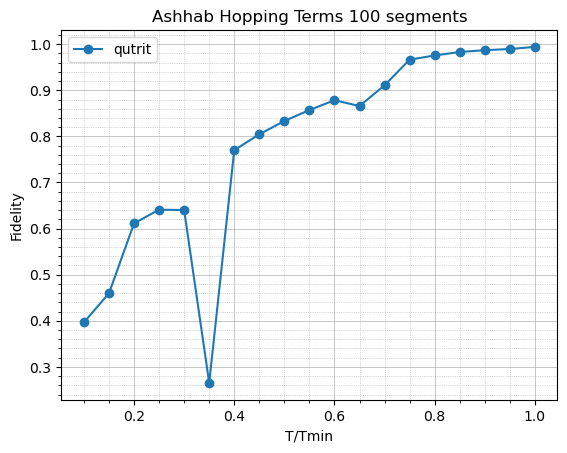

In [ ]:
Ashhab_Hopp100 = pd.read_csv("../ML_Output/Qutrit_CNOT_Ashhab_Hopp_M100_all_g1.0.csv",names=["fidelity","time"])
Ashhab_Hopp100.sort_values(by="time",inplace=True)
Ashhab_Hopp100 = Ashhab_Hopp100.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("Ashhab Hopping Terms 100 segments",Ashhab_Hopp100,["qutrit"])

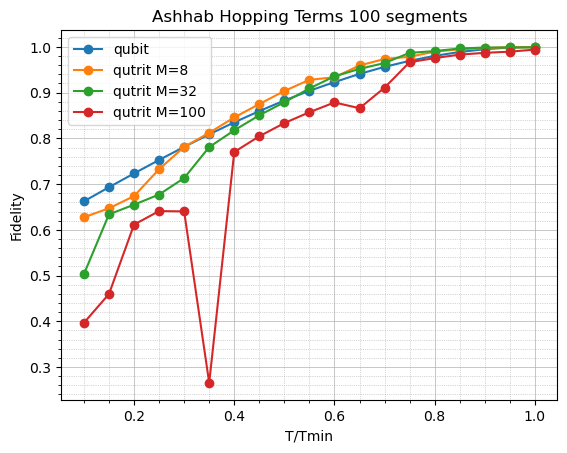

In [ ]:
genPlot("CNOT Protocol",CNOT_PDF,["CNOT Protocol"])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp,["qubit","qutrit"])
genPlot("Ashhab Hopping Terms",Ashhab_Hopp32,["qubit","qutrit M=8","qutrit M=32"])
genPlot("Ashhab Hopping Terms 100 segments",Ashhab_Hopp100,["qubit","qutrit M=8","qutrit M=32","qutrit M=100"])

Here we see that there is minimal change for higher segments. Note that I increased the segments number to a 100 but only did one random seed, so we see non-smooth convergence. It seems as though 8 segments is good enough to get convergence to a fidelity. This is suprising though that the converence is not the $g=2$ qubit calucluation, as there exists terms that are of magnitude 2 in our Hamiltonian. Either our system is having difficulty converging to the global solution, or that our drives cannot fully leverage the higher strength coupling terms. Looking at the relationship between the capped max frequency and the fidelity saturation time, we have 

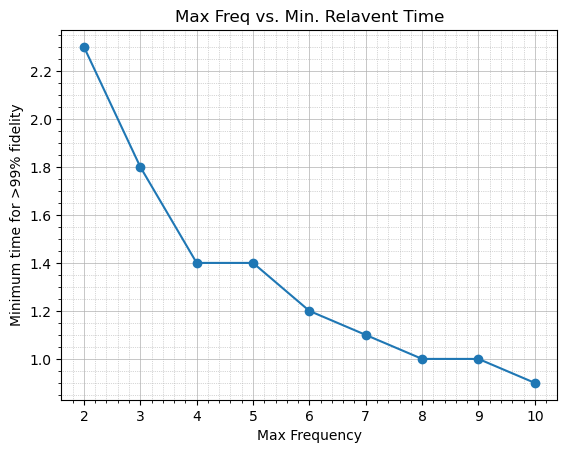

In [53]:
freq = []
times = []
for i in range(1,11):
    file = "../ML_Output/Qutrit_CNOT_AshhabHopp_M8_all_g1.0_maxT3.0_maxD" + str(i) + ".csv"
    df = pd.read_csv(file,names=["fidelity","time"])
    df.sort_values(by="time",inplace=True)
    #print(df[df["fidelity"] >= 0.99]["time"].min())
    freq.append(i)
    times.append(df[df["fidelity"] >= 0.99]["time"].min())
plt.plot(freq,times,"o-")
plt.xlabel("Max Frequency")
plt.ylabel("Minimum time for >99% fidelity")
plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_MaxFreq.pdf"), format="pdf")

Here we see that we need a max frequency greater or equal to 8 to see some sort of speed-up for our system. Here we will do a similar analysis for the iSWAP analytical protocol. 

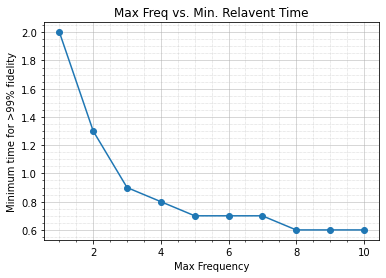

In [3]:
freq = []
times = []
for i in range(1,11):
    file = "../ML_Output/Qutrit_iSWAP_AnalyticalSpeedUp_M16_all_g1.0_maxT3.0_maxD" + str(i) + ".csv"
    df = pd.read_csv(file,names=["fidelity","time"])
    df.sort_values(by="time",inplace=True)
    #print(df[df["fidelity"] >= 0.99]["time"].min())
    freq.append(i)
    times.append(df[df["fidelity"] >= 0.99]["time"].min())
plt.plot(freq,times,"o-")
plt.xlabel("Max Frequency")
plt.ylabel("Minimum time for >99% fidelity")
plt.title("Max Freq vs. Min. Relavent Time")
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.savefig(os.path.join(os.getcwd(),"Figures/","Analytical_MaxFreq.pdf"), format="pdf")

## Full Coupling Hamiltonian

Here we will test if there is a larger speed-up given a coupling matrix with $(d-1)^2$ 

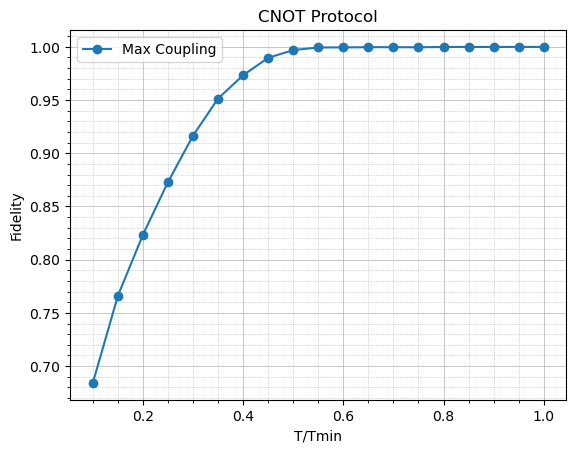

In [ ]:
CNOT_32DF = pd.read_csv("../ML_Output/Qutrit_CNOT_Full_M8_all_g1.0.csv",names=["fidelity","time"])
CNOT_32DF.sort_values(by="time",inplace=True)
CNOT_32DF = CNOT_32DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Protocol",CNOT_32DF,["Max Coupling"])

Here we see if we have a significant speed-up when compared to the baseline qubit case. However, do we achieve an even larger speed-up than our analytical protocol. 

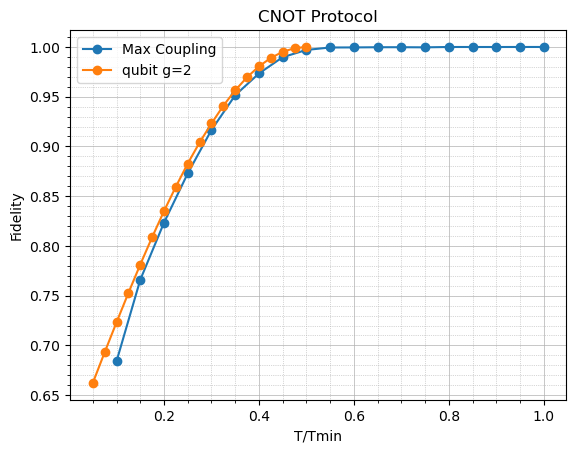

In [ ]:
CNOT_PDF2 = CNOT_PDF.copy(deep=True)
CNOT_PDF2["time"] = 1/(2)*CNOT_PDF2["time"]

genPlot("CNOT Protocol",CNOT_32DF,["Max Coupling"])
genPlot("CNOT Protocol",CNOT_PDF2,["Max Coupling","qubit g=2"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","Full_Mat.pdf"), format="pdf")

Here we essentially see that our speed-up is on the order of $d-1$ and not $(d-1)^2$. Note that this may be deceptive due to a possible constant factor. While there may exist a $(d-1)^2$ speed-up, the numerics could not find a possible speed-up. 

## iSWAP Maximum Frequency Analysis

Here we are going to check on our iSWAP speed-up protocol, and see if we can numerically match our results. Let's first check if we can generate our 7 segment protocol is either 8, 16, or 32 segments. 

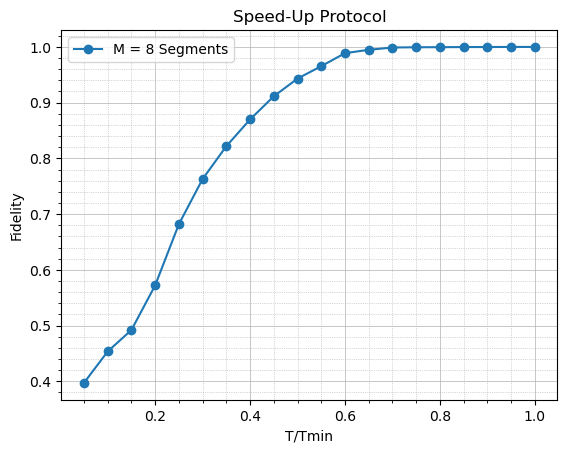

In [ ]:
iSWAP_8DF = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M8_all_g1.0.csv",names=["fidelity","time"])
iSWAP_8DF.sort_values(by="time",inplace=True)
genPlot("Speed-Up Protocol",iSWAP_8DF,["M = 8 Segments"])

Here we see that our protocol does need generate a respective speed-up, but does it saturate the $g=2$ numeric for a qubit. 

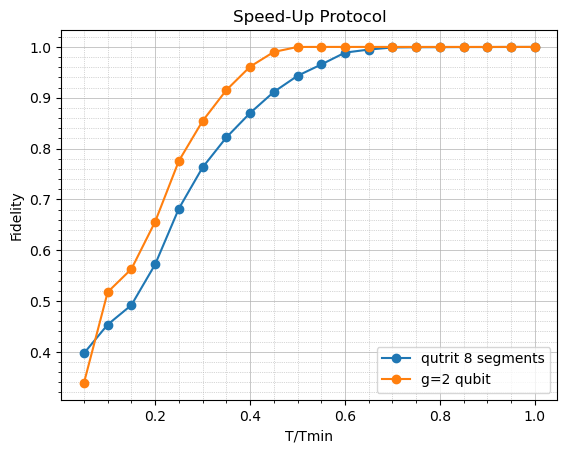

In [ ]:
iSWAP_g2DF = pd.read_csv("../ML_Output/Qubit_iSWAP_XX_M8_all_g2.csv",names=["fidelity","time"])
iSWAP_g2DF.sort_values(by="time",inplace=True)
genPlot("Speed-Up Protocol",iSWAP_8DF,["M = 8 Segments"])
genPlot("Speed-Up Protocol",iSWAP_g2DF,["qutrit 8 segments","g=2 qubit"])

While we do see a speed-up, we do not saturate the analytical protocol. Let's see if increasing the segment count fixes this problem. 

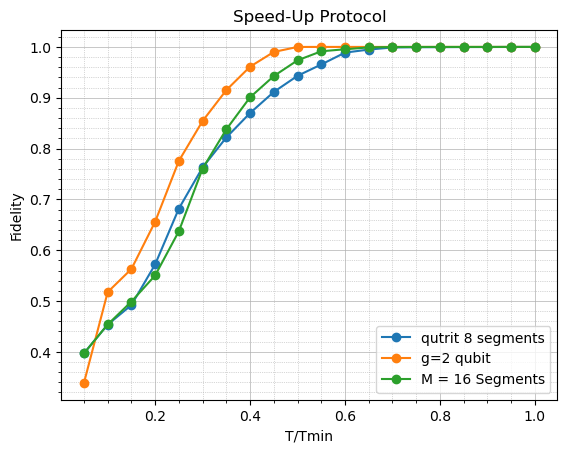

In [47]:
iSWAP_16DF = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M16_all_g1.0.csv",names=["fidelity","time"])
iSWAP_16DF.sort_values(by="time",inplace=True)
genPlot("Speed-Up Protocol",iSWAP_8DF,["M = 8 Segments"])
genPlot("Speed-Up Protocol",iSWAP_g2DF,["qutrit 8 segments","g=2 qubit"])
genPlot("Speed-Up Protocol",iSWAP_16DF,["qutrit 8 segments","g=2 qubit","M = 16 Segments"])

We do see an increase some fidelity points by increasing the segment count from 8 to 16. Now let's go all the way to 32

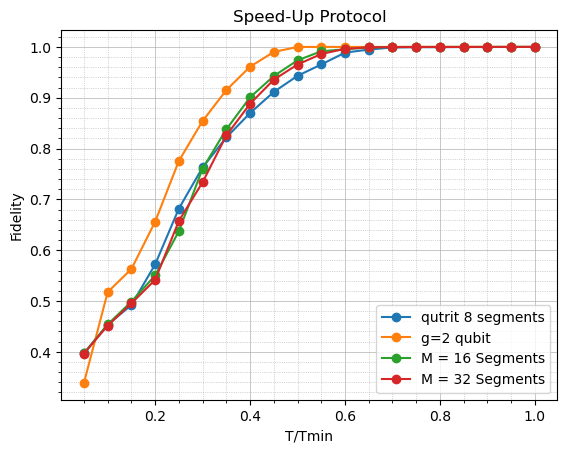

In [48]:
iSWAP_32DF = pd.read_csv("../ML_Output/Qutrit_iSWAP_Speed_Up_M32_all_g1.0.csv",names=["fidelity","time"])
iSWAP_32DF.sort_values(by="time",inplace=True)
genPlot("Speed-Up Protocol",iSWAP_8DF,["M = 8 Segments"])
genPlot("Speed-Up Protocol",iSWAP_g2DF,["qutrit 8 segments","g=2 qubit"])
genPlot("Speed-Up Protocol",iSWAP_16DF,["qutrit 8 segments","g=2 qubit","M = 16 Segments"])
genPlot("Speed-Up Protocol",iSWAP_32DF,["qutrit 8 segments","g=2 qubit","M = 16 Segments","M = 32 Segments"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_Segment_Optimization.pdf"), format="pdf")

Here we do not see that we can fully saturate the $g=2$ analytical limit. 

## Lab Frame Optimization 

Now let's take the Ashhab Hamiltonian in the lab frame. This indicates that we are not making the rotating wave approximation to disregard to high frequency phase differences between energy levels, and we are not making the interaction frame transformation to denote our system in terms of transition frequencies. Now we have done a 1,000 iteration optimziation with a single random seed. 

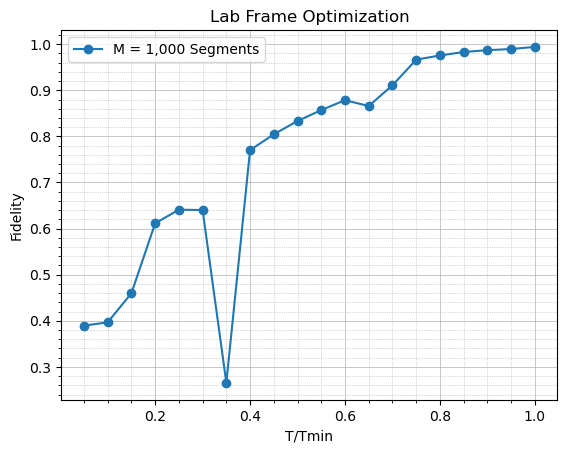

In [45]:
LabFrame_DF = pd.read_csv("../ML_Output/Qutrit_CNOT_Ashhab_Hopp_M100_all_g1.0.csv",names=["fidelity","time"])
LabFrame_DF.sort_values(by="time",inplace=True)
genPlot("Lab Frame Optimization",LabFrame_DF,["M = 1,000 Segments"])

Note that our curve is not as smooth due to the only averaging over a single random seed. Disregarding the point about at 0.35 as a random seed anomaly, we have 

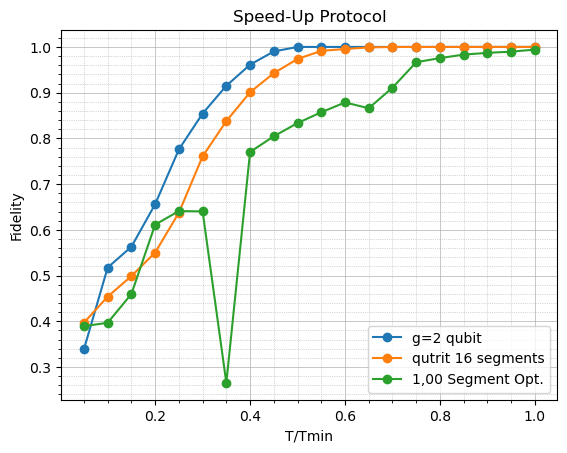

In [49]:
genPlot("Speed-Up Protocol",iSWAP_g2DF,["qutrit 8 segments","g=2 qubit"])
genPlot("Speed-Up Protocol",iSWAP_16DF,["qutrit 8 segments","g=2 qubit","M = 16 Segments"])
genPlot("Speed-Up Protocol",LabFrame_DF,["g=2 qubit","qutrit 16 segments","1,00 Segment Opt."])
plt.savefig(os.path.join(os.getcwd(),"Figures/","Ashhab_LabFrame.pdf"), format="pdf")

Here we see that our optimziation in the lab frame does not saturate the $g=2$ speed-up seen in Ashhab's paper. This may be due to a difference in drives or something due to the control Hamiltonian, but I am not sure. 